In [71]:
from sympy import *
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
init_printing()

In [174]:
R1,R2,R3,R4,R5,C1,C2 = symbols('R1 R2 R3 R4 R5 C1 C2')
a0,a1,b0,b1,b2 = symbols('a_0 a_1 b_0 b_1 b_2')
t = symbols('t',real = True)
x = Function('x')(t)
y = Function('y')(t)
lowpassParam = {R1: 3.9894e3, R2 : 0.8865e3, R3:1e3, R4:1e3,C1:1795.2e-9,C2:398.94e-9}
highpassParam = {R1: 1784.1e3, R2 : 892.06e3, R3:1e3, R4:1e3,C1:1784.1e-9,C2:3568.2e-9}
bandpassParam = {R1: 56.419e3, R2 : 34.117e3, R3:149.72e3, R4:1e3,R5:1e3,C1:56.419e-9,C2:56.419e-9}

filterDEQ = Eq(diff(y,t,2) + a1*diff(y,t) + a0*y, b2*diff(x,t,2) + b1*diff(x,t) + b0*x)

step = Piecewise((0,t<0),(1,t>=0))

#Lowpass
KLP = 1+R4/R3
a1LP = 1/R1/C2+1/R2/C2+1/R2/C1-KLP/R2/C1
a0LP = 1/R1/R2/C1/C2
b0LP = KLP/R1/R2/C1/C2
b1LP = 0
b2LP = 0
LPDict = {a0:a0LP,a1:a1LP,b0:b0LP,b1:b1LP,b2:b2LP}

#Highpass
KHP = 1+R4/R3
a1HP = 1/R2/C2+1/R2/C1+(1-KHP)/R1/C1
a0HP = 1/R1/R2/C1/C2
b0HP = 0
b1HP = 0
b2HP = KHP
HPDict = {a0:a0HP,a1:a1HP,b0:b0HP,b1:b1HP,b2:b2HP}

#bandpass
KBP = 1+R5/R4
a1BP = 1/R1/C1+1/R3/C2+1/R3/C1+(1-KBP)/R2/C1
a0BP = (1/R1+1/R2)/R3/C1/C2
b0BP = 0
b1BP = KBP/R1/C1
b2BP = 0
BPDict = {a0:a0BP,a1:a1BP,b0:b0BP,b1:b1BP,b2:b2BP}

In [48]:
def ODEtoChar(ODE,y,symbol,degree):
    return ODE.subs({diff(y,t,i) : symbol**i for i in range(degree+1)})

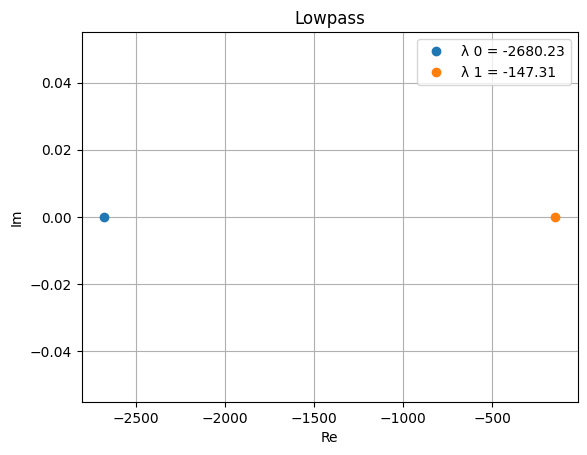

In [49]:
#Exercice 4.2
lpDEQ = (filterDEQ.subs(LPDict)).subs(lowpassParam)
LPChar = ODEtoChar(lpDEQ.lhs,y,Symbol('lambda'),2)
lamba = solve(LPChar,Symbol('lambda'))

plt.figure(1)
plt.title('Lowpass')
plt.xlabel('Re')
plt.ylabel('Im')
plt.grid()
for l in range(len(lamba)):
    plt.plot(re(lamba[l]),im(lamba[l]),'o',label='λ {} = {}'.format(l,lamba[l].round(2)))
plt.legend();

In [73]:
#4.3
#As the system has two different real poles and no complex poles, the system is overdamped
#4.4
#It is linear, silly
#4.5
lpICS = {y.subs(t,0):2,diff(y,t).subs(t,0):0}
dsolve(lpDEQ.lhs,y,ics=lpICS)

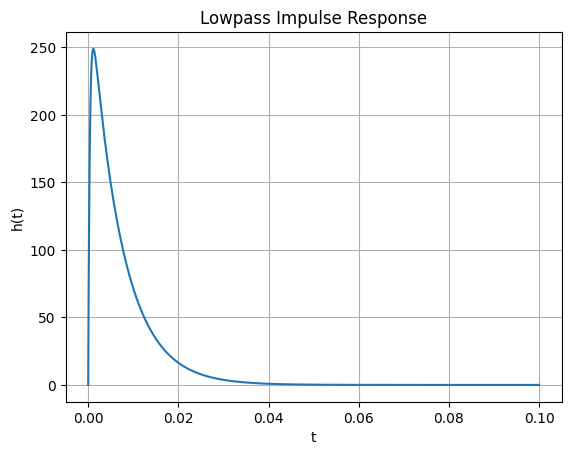

In [88]:
#4.6
lpICS_impulse = {y.subs(t,0):0,diff(y,t).subs(t,0):1}
#4.7
yn = dsolve(lpDEQ.lhs,y,ics=lpICS_impulse).rhs
display(Eq(Function('y_n')(t),yn))
P = lpDEQ.rhs/x
h = (P*yn)*step
h.simplify().expand()
#plot impulse response
plt.figure(2)
plt.title('Lowpass Impulse Response')
plt.xlabel('t')
plt.ylabel('h(t)')
plt.grid()
tp = np.linspace(0,0.1,1000)
hp = lambdify(t,h)
plt.plot(tp,hp(tp));

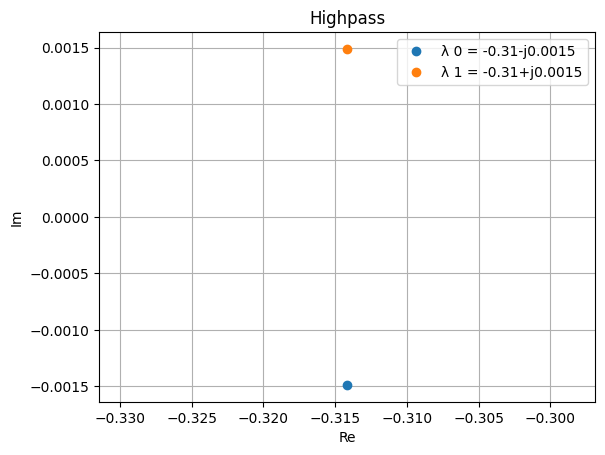

In [85]:
#Exercise 5.2
hpDEQ = (filterDEQ.subs(HPDict)).subs(highpassParam)
HPChar = ODEtoChar(hpDEQ.lhs,y,Symbol('lambda'),2)
lamba = solve(HPChar,Symbol('lambda'))
plt.figure(3)
plt.title('Highpass')
plt.xlabel('Re')
plt.ylabel('Im')
plt.grid()
for l in range(len(lamba)):
    plt.plot(re(lamba[l]),im(lamba[l]),'o',label='λ {} = {}{}j{}'.format(l,re(lamba[l]).round(2),'+' if im(lamba[l])>=0 else '-',abs(im(lamba[l]).round(4))))
plt.legend();

In [86]:
#5.3
#As the system has two different complex poles, the system is underdamped
#5.4
#It is linear, silly
#5.5
hpICS = {y.subs(t,0):0,diff(y,t).subs(t,0):0}
dsolve(hpDEQ.lhs,y,ics=hpICS)

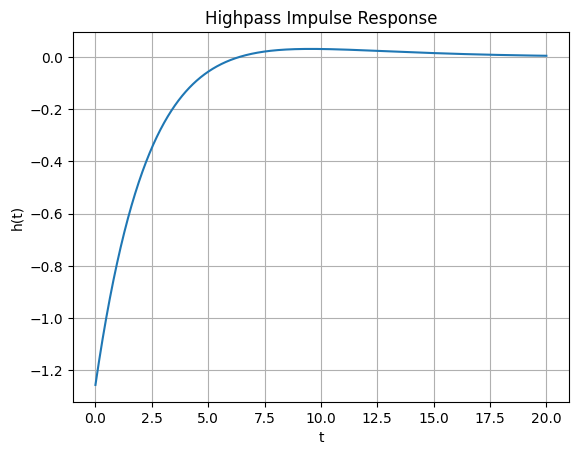

In [147]:
#5.6
hpICS_impulse = {y.subs(t,0):0,diff(y,t).subs(t,0):1}
#5.7
yn = dsolve(hpDEQ.lhs,y,ics=hpICS_impulse).rhs
display(Eq(Function('y_n')(t),yn))
P = hpDEQ.rhs.subs(x,y)
h = ((P.subs(y,yn))*step).subs(y,yn).simplify()
#plot impulse response
plt.figure(2)
plt.title('Highpass Impulse Response')
plt.xlabel('t')
plt.ylabel('h(t)')
plt.grid()
tp = np.linspace(0,20,1000)
hp = lambdify(t,h,modules=['numpy'])
plt.plot(tp,hp(tp));


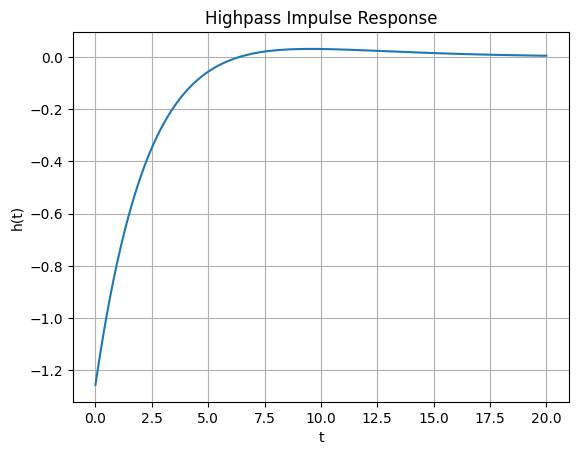

In [146]:
#5 alternate
lamba = [re(l) for l in lamba]
c1,c2 = symbols('c_1 c_2')
yhom = Eq(y,(c1+t*c2)*exp(lamba[0]*t))
eq1 = yhom.subs(t,0).subs(hpICS_impulse)
eq2 = Eq(diff(y,t),yhom.rhs.diff(t)).subs(t,0).subs(hpICS_impulse)
yn = yhom.rhs.subs(solve([eq1,eq2],(c1,c2)))
display(Eq(Function('y_n')(t),yn))
P = hpDEQ.rhs.subs(x,y)
h = ((P.subs(y,yn))*step).subs(y,yn).simplify()
#plot impulse response
plt.figure(2)
plt.title('Highpass Impulse Response')
plt.xlabel('t')
plt.ylabel('h(t)')
plt.grid()
tp = np.linspace(0,20,1000)
hp = lambdify(t,h,modules=['numpy'])
plt.plot(tp,hp(tp));

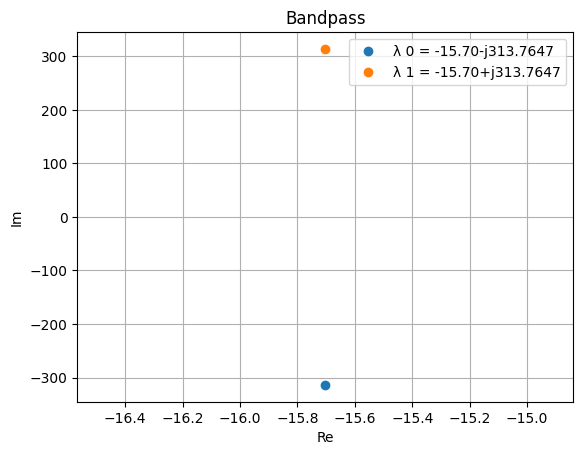

In [175]:
#Exercise 6.2
bpDEQ = (filterDEQ.subs(BPDict)).subs(bandpassParam)
BPChar = ODEtoChar(bpDEQ.lhs,y,Symbol('lambda'),2)
lamba = solve(BPChar,Symbol('lambda'))
plt.figure(4)
plt.title('Bandpass')
plt.xlabel('Re')
plt.ylabel('Im')
plt.grid()
for l in range(len(lamba)):
    plt.plot(re(lamba[l]),im(lamba[l]),'o',label='λ {} = {}{}j{}'.format(l,re(lamba[l]).round(2),'+' if im(lamba[l])>=0 else '-',abs(im(lamba[l]).round(4))))
    
plt.legend();

In [177]:
#6.3 Underdamped
#6.4 Linear
#6.5
bpICS = {y.subs(t,0):0,diff(y,t).subs(t,0):0}
dsolve(bpDEQ.lhs,y,ics=bpICS)

⎧                                                              0              
⎪                                                                             
⎨                    -15.7029854323906⋅t                                      
⎪- 31.4454212050538⋅ℯ                   ⋅sin(313.764668780023⋅t) + 628.3176031
⎩                                                                             

                                                   for t < 0
                                                            
      -15.7029854323906⋅t                                   
4191⋅ℯ                   ⋅cos(313.764668780023⋅t)  otherwise
                                                            

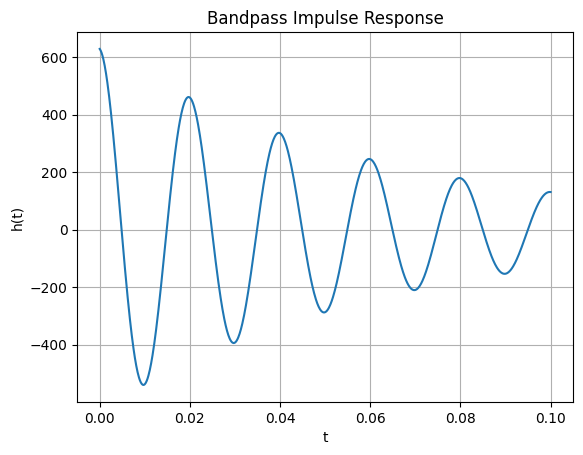

In [178]:
#6.6
bpICS_impulse = {y.subs(t,0):0,diff(y,t).subs(t,0):1}
#6.7
yn = dsolve(bpDEQ.lhs,y,ics=bpICS_impulse).rhs
display(Eq(Function('y_n')(t),yn))
P = bpDEQ.rhs.subs(x,y)
h = ((P.subs(y,yn))*step).subs(y,yn).simplify()
display(h.expand())
#plot impulse response
plt.figure(5)
plt.title('Bandpass Impulse Response')
plt.xlabel('t')
plt.ylabel('h(t)')
plt.grid()
tp = np.linspace(0,0.1,1000)
hp = lambdify(t,h,modules=['numpy'])
plt.plot(tp,hp(tp));